## Predictive ML Project
### 1895 through 2018 January average high temperatures in New York City
### Author: Branton Dawson
### GitHub project repository: [datafun-07-ml](https://github.com/bjdawson23/datafun-07-ml)

In [310]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression



## Part 1 - Chart a Straight Line 

1. Store each Fahrenheit/Celsius pair as a tuple in temps.
2. Then place data in a DataFrame.
3. Set the y-axis label to Celsius.

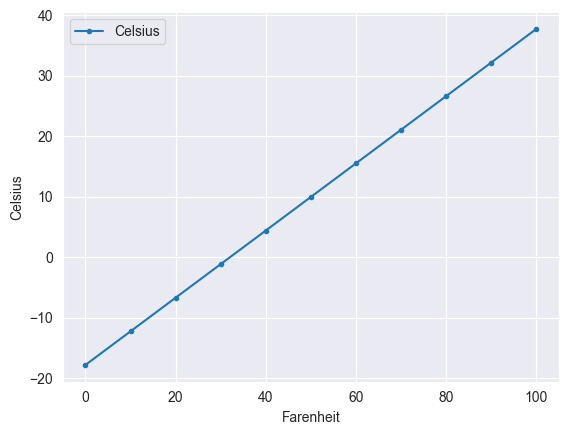

In [311]:
c = lambda f: 5 / 9 * (f - 32)
temps = [(f, c(f)) for f in range(0, 101, 10)]
temps_df = pd.DataFrame(temps, columns=['Farenheit', 'Celsius'])
axes = temps_df.plot(x='Farenheit', y='Celsius', style='.-')
y_label = axes.set_ylabel('Celsius')

## Part 2 - Prediction

### Section 1 - Data Acquisition

In [312]:
nyc_df = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

### Section 2 - Data Inspection

In [313]:
nyc_df.head(10)

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


In [314]:
nyc_df.tail(10)

,Date,Value,Anomaly
114,200901,33.4,-4.0
115,201001,38.1,0.7
116,201101,34.8,-2.6
117,201201,44.2,6.8
118,201301,40.8,3.4
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


### Section 3 - Data Cleaning

In [315]:
nyc_df.columns = ['Date', 'Temperature', 'Anomaly']

In [316]:
nyc_df.head(10)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0
5,190001,37.4,0.0
6,190101,37.0,-0.4
7,190201,35.0,-2.4
8,190301,35.5,-1.9
9,190401,29.8,-7.6


In [317]:
nyc_df.Date.dtype

dtype('int64')

In [318]:
nyc_df.Date = nyc_df.Date.floordiv(100)

In [319]:
nyc_df.head(10)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9
3,1898,39.6,2.2
4,1899,36.4,-1.0
5,1900,37.4,0.0
6,1901,37.0,-0.4
7,1902,35.0,-2.4
8,1903,35.5,-1.9
9,1904,29.8,-7.6


### Section 4 - Descriptive Statistics

In [320]:
pd.set_option('display.precision', 2)

In [321]:
nyc_df.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

### Section 5 - Build the Model

In [322]:
linear_regression = stats.linregress(x=nyc_df.Date,
                                     y=nyc_df.Temperature)

In [323]:
linear_regression.slope

np.float64(0.014771361132966163)

In [324]:
linear_regression.intercept

np.float64(8.694993233674289)

### Section 6 - Predict
1. Predict temperature in the year 2024.

In [325]:
linear_regression.slope * 2024 + linear_regression.intercept

np.float64(38.5922281667978)

2. Predict what the temperature may have been in the year 1850.

In [326]:
linear_regression.slope * 1850 + linear_regression.intercept

np.float64(36.022011329661694)

### Section 7 - Visualizations

(10.0, 70.0)

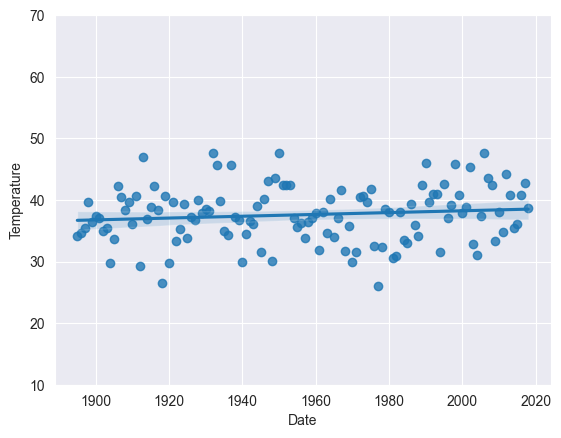

In [327]:
# Plot the average high temperatures and regression line
sns.set_style('darkgrid')
axes = sns.regplot(x=nyc_df.Date, y=nyc_df.Temperature)

# Scale y-axis 
axes.set_ylim(10, 70)

## Part 3 - Prediction

### Section 1 - Build the Model

In [328]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    nyc_df.Date.values.reshape(-1, 1), nyc_df.Temperature.values,
    random_state=11)


In [329]:
X_train.shape

(93, 1)

In [330]:
X_test.shape

(31, 1)

In [331]:
# Train a 'LinearRegression' estimator
linear_regression = LinearRegression()


In [332]:
linear_regression.fit(X=X_train, y=y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [333]:
# Getting the coefficient (slope)
linear_regression.coef_

array([0.01939167])

In [334]:
# Getting the intercept 
linear_regression.intercept_

np.float64(-0.30779820252656975)

### Section 2 - Test the Model
##### - Check some of the predictions by displaying the predicted and expected values for every fifth element

In [335]:
predicted = linear_regression.predict(X_test)
expected = y_test

In [336]:
for p, e in zip(predicted[::5], expected[::5]):
                print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


### Section 3 - Predict
##### -  Predict the "average high temp in Jan" for the year 2024 and 1850

In [337]:
# Predict the January 2024 average high temperature 
predict = (lambda x: linear_regression.coef_ * x + 
                     linear_regression.intercept_)

In [338]:
predict(2024)

array([38.94094855])

In [339]:
predict(1850)

array([35.56679739])

### Section 4 - Visualizations
##### - Create a scatter plot of the dataset using Seaborn’s scatterplot function and Matplotlib’s plot function.

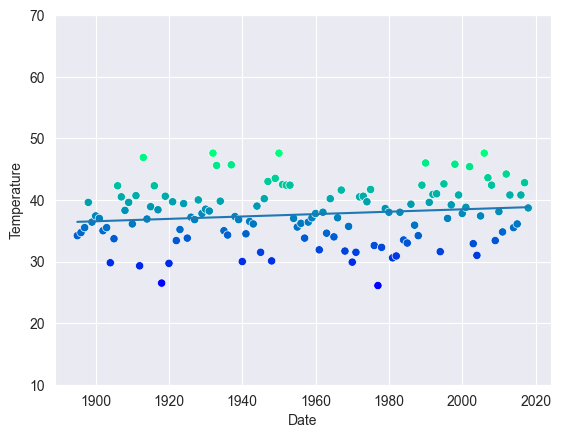

In [340]:
axes = sns.scatterplot(data=nyc_df, x='Date', y='Temperature',
    hue='Temperature', palette='winter', legend=False)

# Scale the y-axis
axes.set_ylim(10, 70)

# Create array containing the min and max date values
x = np.array([min(nyc_df.Date.values), max(nyc_df.Date.values)])

y = predict(x)

# Plot the line
line = plt.plot(x, y)

## Part 4 - Insights
- The visualization helps us understand how NYC temperatures change over time, how well your model fits the data, and whether there are any unusual temperature events or trends worth further investigation.   
- The y-axis is limited to 10–70°F, focusing the visualization on the most relevant temperature range and making outliers or extreme values more apparent. 
- Any points far from the trend line or the main cluster may indicate outliers or unusual weather events. 
- The scatterplot shows how temperature varies across different dates, allowing you to visually assess seasonal trends, patterns, or anomalies in NYC temperature data.